# Stable Video Diffusion

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ce9e075c-7c48-b556-6fdd-d71704f1e683)


In [2]:
# !pip3 install torch torchvision torchaudio diffusers transformers accelerate

In [3]:
# !pip install transformers

In [4]:
# import torch

In [5]:

# !pip install opencv-python-headless

In [6]:
# !pip install accelerate

In [7]:
import torch
import diffusers
import transformers

In [8]:
torch.__version__

'2.6.0+cu124'

In [9]:
diffusers.__version__

'0.32.2'

In [10]:
transformers.__version__

'4.50.3'

In [11]:
import cv2

In [12]:
cv2.__version__

'4.11.0'

In [13]:
from diffusers import StableVideoDiffusionPipeline

In [14]:
pipe = StableVideoDiffusionPipeline.from_pretrained('stabilityai/stable-video-diffusion-img2vid-xt',
                                                   torch_dtype=torch.float16,
                                                   variant='fp16')

# moves parts of the Stable Diffusion model between CPU and GPU automatically during inference to reduce GPU memory usage.
pipe.enable_model_cpu_offload()

model_index.json:   0%|          | 0.00/496 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/3.05G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/984 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/196M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [15]:
from diffusers.utils import load_image, export_to_video

In [17]:
image = load_image("Tanajib-Screenshot 2024-12-09 at 21.00.16.png")

In [18]:
image.size

(1876, 1244)

In [19]:
# image.resize((1024,576))

In [20]:
generator = torch.manual_seed(42)

In [21]:
frames = pipe(image,decode_chunk_size=8,generator=generator).frames[0]

  0%|          | 0/25 [00:00<?, ?it/s]

In [22]:
export_to_video(frames,'generated.mp4',fps=7)

'generated.mp4'

In [23]:
type(frames)

list

In [24]:
type(frames[0])

PIL.Image.Image

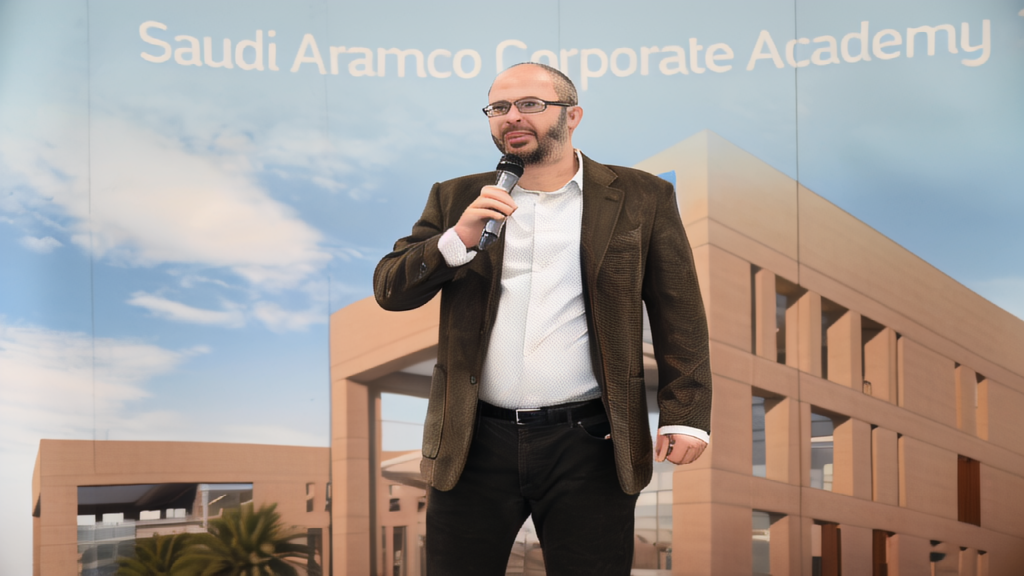

In [25]:
frames[1]